In [2]:
import pandas as pd
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [3]:
data = pd.read_csv("datasets/challenger.csv")

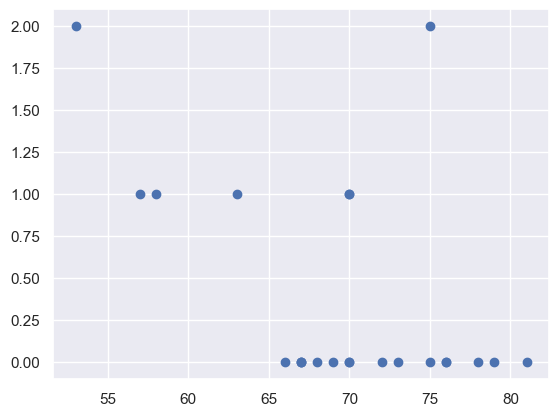

In [4]:
plt.scatter(data["Temp"], data["Damaged"])

<AxesSubplot: xlabel='Damaged', ylabel='Count'>

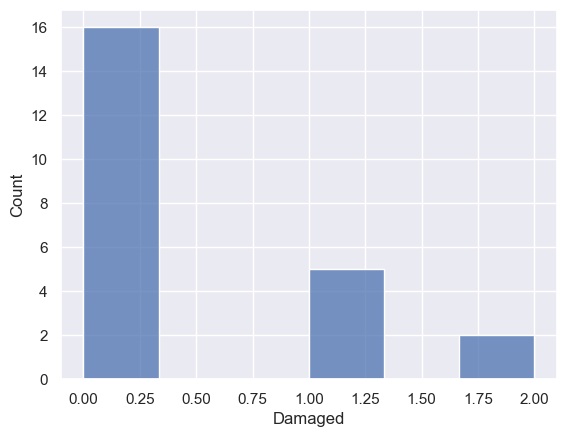

In [5]:
sns.histplot(data, x="Damaged")

In [4]:
y = data["Damaged"]
T = data["Temp"]

$$ \beta_0 , \beta_1 \sim N(0, 10) $$
$$ log(\lambda) = \beta_0 + \beta_1 T_i $$
$$ y_i \sim Poisson( \lambda ) $$

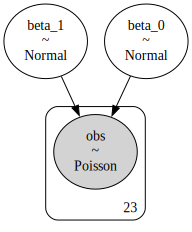

In [5]:
with pm.Model() as m:
    beta_0 = pm.Normal("beta_0", mu=0, sigma=10)
    beta_1 = pm.Normal("beta_1", mu=0, sigma=10)

    lam = pm.math.exp(beta_0 + beta_1 * T)
    obs = pm.Poisson("obs", mu=lam, observed=y)

pm.model_to_graphviz(m)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta_0, beta_1]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 7 seconds.


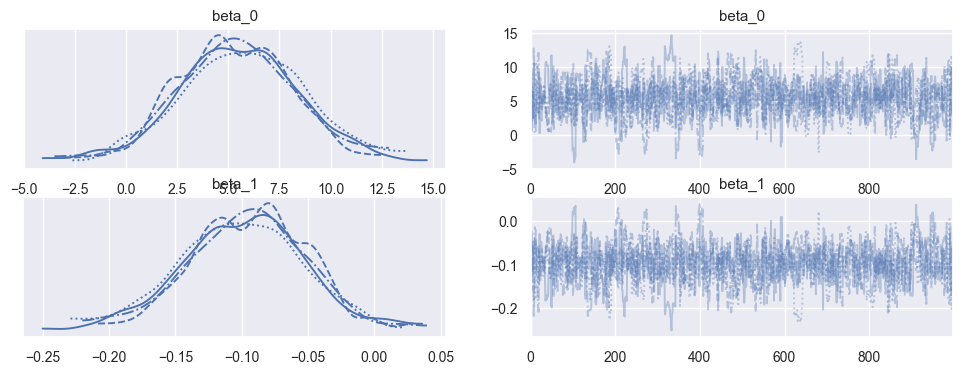

In [6]:
with m:
    trace = pm.sample(target_accept=0.9)
    pm.plot_trace(trace)
    post = pm.sample_posterior_predictive(trace)

In [7]:
b_0 = trace["posterior"]["beta_0"].mean().to_numpy()
b_1 = trace["posterior"]["beta_1"].mean().to_numpy()

x_range = np.linspace(T.min(), T.max(), 1000)
pred = np.exp(b_0 + b_1 * x_range)

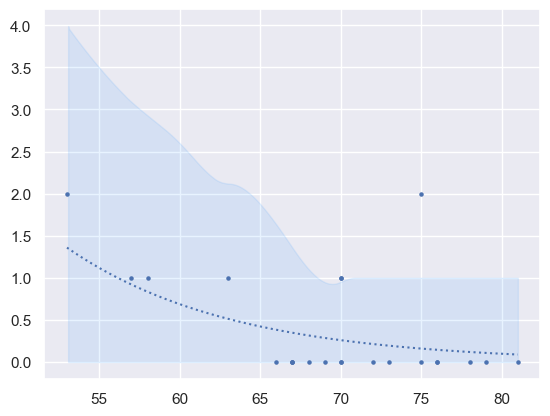

In [8]:
pm.plot_hdi(x=T, y=post["posterior_predictive"]["obs"], fill_kwargs={"color":"dodgerblue", "alpha":0.1})
plt.scatter(T, y, s=5)
plt.plot(x_range, pred, linestyle="dotted")